In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [26]:
gait = pd.read_csv('gait.csv')

Function

In [27]:
#1. Check Unique values, Missing values, Duplicate rows
#count for unique values, missing values, duplicates
def get_data_overview(data):
    # Get column info
    num_data = data.select_dtypes(include=['float64', 'int64'])
    #count num
    num = ['int64', 'float64']
    num_df = data.select_dtypes(include=num)
    num_count= len(num_df.columns)

    cat_data = data.select_dtypes(include=['object'])
    #count cat
    cat = ['object']
    cat_df = data.select_dtypes(include=cat)
    cat_count =len(cat_df.columns)

    #numeric data
    num_info = pd.DataFrame(num_data.dtypes.astype(str), columns=["Data Type"])
    num_info.index.name = "Column Name"
    num_info["No of Unique Values"] = num_data.nunique()
    num_info["No of Missing Values"] = num_data.isnull().sum()
    num_info["% of Missing Values"] = round((num_info["No of Missing Values"] / len(num_data)) * 100, 2)
    num_info["No of Duplicates"] = num_data.duplicated().sum()
    #num_info["No of Duplicates"] = num_data.apply(lambda x: x.duplicated().sum())

    #categorical data
    cat_info = pd.DataFrame(cat_data.dtypes.astype(str), columns=["Data Type"])
    cat_info.index.name = "Column Name"
    cat_info["No of Unique Values"] = cat_data.nunique()
    cat_info["No of Missing Values"] = cat_data.isnull().sum()
    cat_info["% of Missing Values"] = round((cat_info["No of Missing Values"] / len(cat_data)) * 100, 2)
    cat_info["No of Duplicates"] = cat_data.duplicated().sum()

     # Print overview table
    print(f"{'-'*120}\n{'Numeric Columns (' + str(num_count) + ' attributes)':^120}\n{'-'*120}\n{num_info.index.name:20} {'Data Type':10} {'No of Unique Values':20} {'No of Missing Values':20} {'% of Missing Values':20} {'No of Duplicates':20}\n{'-'*120}")
    for i in range(len(num_info)):
        print(f"{num_info.index[i]:20} {str(num_info.iloc[i, 0]):>10} {num_info.iloc[i, 1]:>20} {num_info.iloc[i, 2]:>20} {num_info.iloc[i, 3]:>20} {num_info.iloc[i, 4]:>20}")

    print(f"{'-'*120}\n{'Categorical Columns (' + str(cat_count) + ' attributes)':^120}\n{'-'*120}\n{cat_info.index.name:20} {'Data Type':10} {'No of Unique Values':20} {'No of Missing Values':20} {'% of Missing Values':20} {'No of Duplicates':20}\n{'-'*120}")
    for i in range(len(cat_info)):
        print(f"{cat_info.index[i]:20} {str(cat_info.iloc[i, 0]):>10} {cat_info.iloc[i, 1]:>20} {cat_info.iloc[i, 2]:>20} {cat_info.iloc[i, 3]:>20} {cat_info.iloc[i, 4]:>20}")

In [28]:
def check_null_values(data):
    null_counts = data.isnull().sum()
    return null_counts

In [29]:
# Numerical Variables
def corr_plot(data, remove=["Id"], corr_coef = "pearson", figsize=(20, 20)):
    if len(remove) > 0:
        num_cols2 = [x for x in data.columns if (x not in remove)]

    sns.set(font_scale=1.1)
    c = data[num_cols2].corr(method = corr_coef)
    mask = np.triu(c.corr(method = corr_coef))
    plt.figure(figsize=figsize)
    sns.heatmap(c,
                annot=True,
                fmt='.1f',
                cmap='coolwarm',
                square=True,
                mask=mask,
                linewidths=1,
                cbar=False)
    plt.show()

In [30]:
# Plot numerical variables
def num_plot(data, num_cols, remove=["Id"], hist_bins=10, figsize=(20, 4)):

    if len(remove) > 0:
        num_cols2 = [x for x in num_cols if (x not in remove)]

    for i in num_cols2:
        fig, axes = plt.subplots(1, 3, figsize=figsize)
        data.hist(str(i), bins=hist_bins, ax=axes[0])
        data.boxplot(str(i), ax=axes[1], vert=False);
        try:
            sns.kdeplot(np.array(data[str(i)]))
        except:
            ValueError

        axes[1].set_yticklabels([])
        axes[1].set_yticks([])
        axes[0].set_title(i + " | Histogram")
        axes[1].set_title(i + " | Boxplot")
        axes[2].set_title(i + " | Density")
        plt.show()

Overview

In [31]:
gait.head()

,subject,condition,replication,leg,joint,time,angle
0,1,1,1,1,1,0,4.682881
1,1,1,1,1,1,1,5.073127
2,1,1,1,1,1,2,5.229774
3,1,1,1,1,1,3,5.083273
4,1,1,1,1,1,4,4.652399


In [33]:
print("Bộ dữ liệu có", gait.shape[0], "dòng và", gait.shape[1],"cột.")

Bộ dữ liệu có 181800 dòng và 7 cột.


In [10]:
get_data_overview(gait)

------------------------------------------------------------------------------------------------------------------------
                                             Numeric Columns (7 attributes)                                             
------------------------------------------------------------------------------------------------------------------------
Column Name          Data Type  No of Unique Values  No of Missing Values % of Missing Values  No of Duplicates    
------------------------------------------------------------------------------------------------------------------------
subject                   int64                   10                    0                  0.0                    0
condition                 int64                    3                    0                  0.0                    0
replication               int64                   10                    0                  0.0                    0
leg                       int64                    2

Bộ dữ liệu gồm 7 thuộc tính numeric: subject, condition, replication, leg, joint, time, angle

In [13]:
check_null_values(gait)

subject        0
condition      0
replication    0
leg            0
joint          0
time           0
angle          0
dtype: int64

Bộ dữ liệu không có giá trị null

In [15]:
# Numeric Features
gait.describe([.01, .1, .25, .5, .75, .8, .9, .95, .99])[1:]

,subject,condition,replication,leg,joint,time,angle
mean,5.500000,2.000000,5.500000,1.500000,2.000000,50.00000,12.149321
std,2.872289,0.816499,2.872289,0.500001,0.816499,29.15484,16.025823
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,-27.004634
1%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,-13.858372
10%,1.900000,1.000000,1.900000,1.000000,1.000000,10.00000,-4.197934
25%,3.000000,1.000000,3.000000,1.000000,1.000000,25.00000,1.794457
50%,5.500000,2.000000,5.500000,1.500000,2.000000,50.00000,9.466976
75%,8.000000,3.000000,8.000000,2.000000,3.000000,75.00000,18.559890
80%,8.200000,3.000000,8.200000,2.000000,3.000000,80.00000,21.300873
90%,9.100000,3.000000,9.100000,2.000000,3.000000,90.00000,29.467895


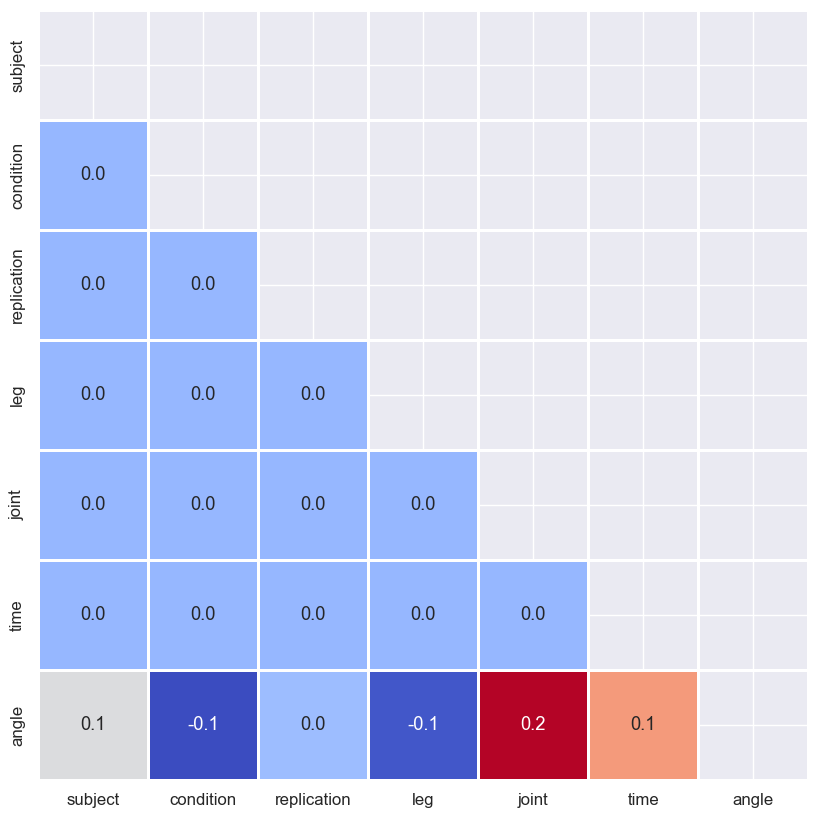

In [32]:
# Correlation
corr_plot(gait, corr_coef = "spearman", figsize = (10,10))

array([[<Axes: title={'center': 'subject'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'replication'}>],
       [<Axes: title={'center': 'leg'}>,
        <Axes: title={'center': 'joint'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'angle'}>, <Axes: >, <Axes: >]],
      dtype=object)

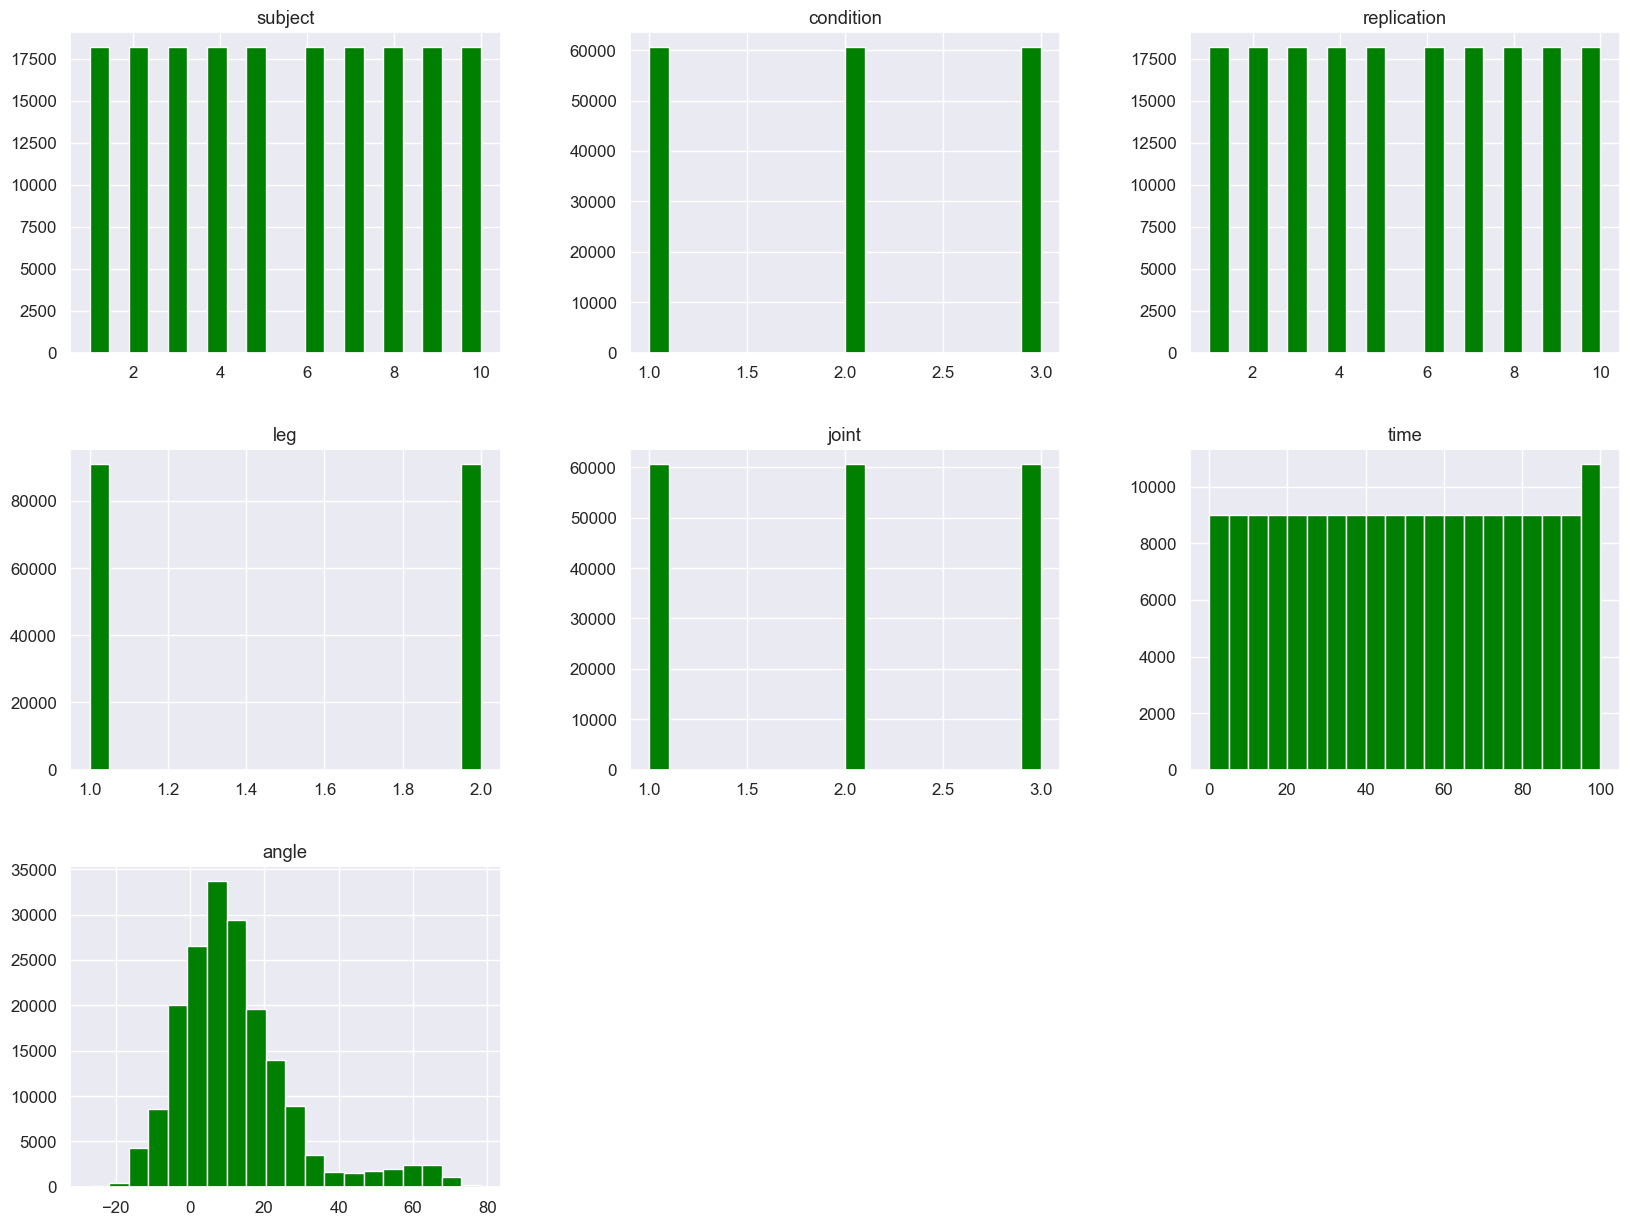

In [37]:
gait.hist(bins=20, figsize=(20,15), color='#008000')

array([[<Axes: xlabel='subject', ylabel='subject'>,
        <Axes: xlabel='condition', ylabel='subject'>,
        <Axes: xlabel='replication', ylabel='subject'>,
        <Axes: xlabel='leg', ylabel='subject'>,
        <Axes: xlabel='joint', ylabel='subject'>,
        <Axes: xlabel='time', ylabel='subject'>,
        <Axes: xlabel='angle', ylabel='subject'>],
       [<Axes: xlabel='subject', ylabel='condition'>,
        <Axes: xlabel='condition', ylabel='condition'>,
        <Axes: xlabel='replication', ylabel='condition'>,
        <Axes: xlabel='leg', ylabel='condition'>,
        <Axes: xlabel='joint', ylabel='condition'>,
        <Axes: xlabel='time', ylabel='condition'>,
        <Axes: xlabel='angle', ylabel='condition'>],
       [<Axes: xlabel='subject', ylabel='replication'>,
        <Axes: xlabel='condition', ylabel='replication'>,
        <Axes: xlabel='replication', ylabel='replication'>,
        <Axes: xlabel='leg', ylabel='replication'>,
        <Axes: xlabel='joint', ylabel='r

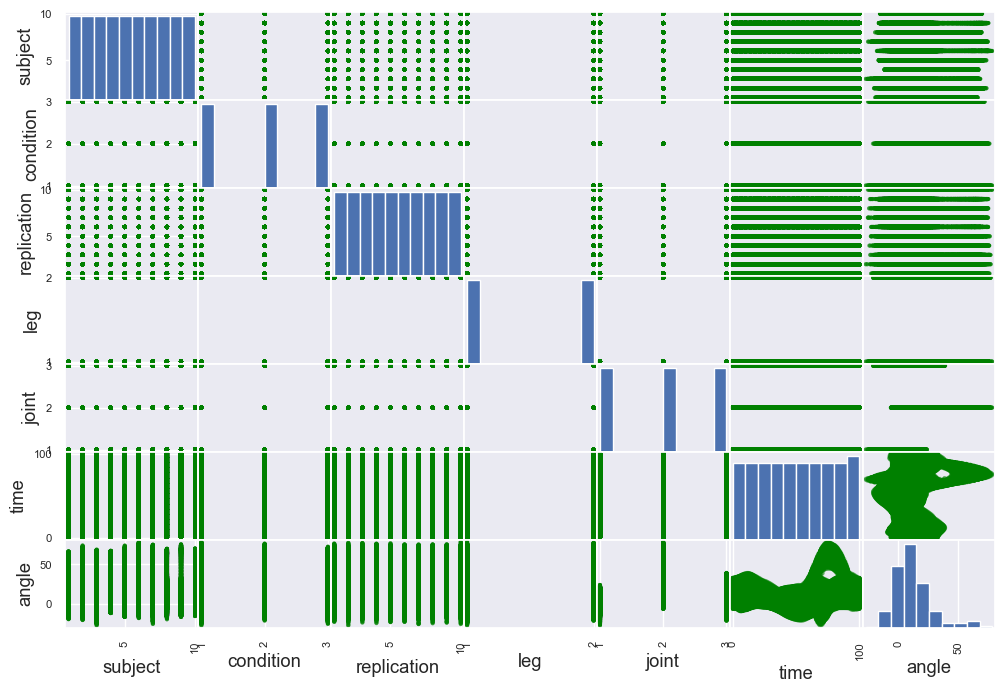

In [44]:
colors='#008000'
scatter_matrix(gait[gait.columns], figsize=(12,8), color=colors)

<Axes: xlabel='time', ylabel='angle'>

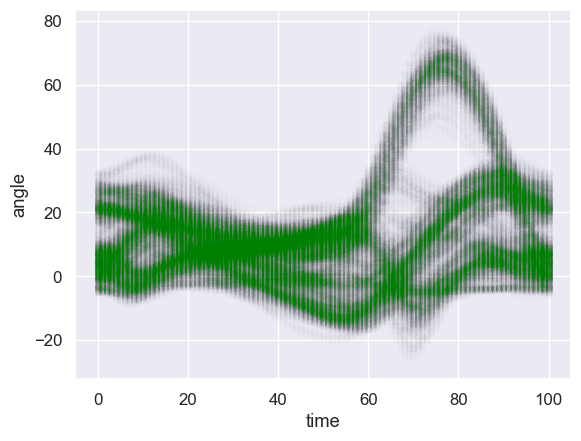

In [36]:
gait.plot(kind='scatter', x='time', y='angle', alpha=0.002, color='#008000')